<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/6_proyectos/clase_38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clase 38 – Samsung Innovation Campus 2025

**Fecha:** 29 de octubre
**Tema central:** Redes Neuronales Recurrentes (RNN) y LSTM
**Fuente:**

En esta clase se continuó con las exposiciones del **Capítulo 9**, específicamente con el **Grupo encargado de la Unidad sobre Redes Neuronales Recurrentes (RNN)**.
A diferencia de la clase anterior, donde expuso el grupo de CNN, en esta sesión **el grupo de RNN realizó su presentación completa**, seguido del grupo de **GAN**, que alcanzó a exponer su parte principal.

La clase además incluyó un espacio de conversación espontánea sobre experiencias docentes, inteligencia artificial en la educación, y posibles ideas para proyectos finales, especialmente relacionados con **traducción automática y lenguaje de señas**.

---

## Exposición del Grupo: Redes Neuronales Recurrentes (RNN)

El grupo explicó que las **RNN** son utilizadas para procesar **datos secuenciales**, es decir, datos donde **el orden importa**, como:

* Lenguaje natural (texto).
* Audio y voz.
* Series temporales (valores que cambian en el tiempo, como precios o señales).

### Conceptos claves trabajados:

1. **Dependencia temporal:**
   Cada paso de la secuencia depende de la información anterior.

2. **Estado oculto (Hidden State):**
   Es la memoria interna que la red va transmitiendo de paso en paso y que resume el contexto previo.

3. **Esquemas de entrada y salida revisados:**

   * Many to Many (traducción automática).
   * Many to One (clasificación de sentimiento).
   * One to Many (generación de texto a partir de una señal inicial).



---

## Extensión de las RNN: LSTM (Long Short-Term Memory)

El grupo explicó que las **LSTM** fueron creadas para resolver la pérdida de memoria en secuencias largas.
Para ello, utilizan **tres puertas** que controlan el flujo de información:

| Puerta          | Función                                                |
| --------------- | ------------------------------------------------------ |
| Forget (Olvido) | Decide qué información olvidar.                        |
| Input (Entrada) | Decide qué nueva información guardar.                  |
| Output (Salida) | Determina qué parte de la memoria se usa en la salida. |

Esto permite que **el modelo conserve información relevante a largo plazo** sin desbordarse con ruido o sobreajuste.

Se dio un ejemplo práctico de uso en **traducción automática**, mostrando cómo el sentido de palabras como “como” depende del **contexto previo**, algo que las LSTM manejan mejor que una RNN simple.



---

## Conversación Pedagógica y Proyectos

Se generó un intercambio significativo sobre:

* Dificultades reales de implementar proyectos en aula.
* Cultura y variación en **lengua de señas**, destacando:

  * No es universal.
  * Cambia según país, edad y comunidad.
  * Su contexto es crucial para interpretar significados.

A partir de esto surgió una **idea de proyecto final**:
**Modelo de reconocimiento de señas a partir de videos públicos**, posiblemente usando:

* Grabaciones de festivales y transmisiones.
* Técnicas de anotación y segmentación.
* Roboflow para etiquetado.

El grupo discutió la necesidad de **dataset y enfoque comunitario**.



---

## Exposición del Grupo: GAN (Generative Adversarial Networks)

El segundo grupo explicó el funcionamiento de las **GAN**, destacando la interacción entre:

| Red               | Rol                                        |
| ----------------- | ------------------------------------------ |
| Generador (G)     | Produce imágenes falsas a partir de ruido. |
| Discriminador (D) | Decide si una imagen es real o falsa.      |

Se mostraron ejemplos como:

* **thispersondoesnotexist.com** (personas que no existen).
* Juegos para distinguir rostros falsos y reales.

Se revisó además por qué la GAN mejora con el entrenamiento:

* El generador se vuelve mejor engañando.
* El discriminador se vuelve mejor detectando.
* Ambas redes se empujan mutuamente a mejorar.



---

## Síntesis Final

| Aspecto              | Resumen                                                                           |
| -------------------- | --------------------------------------------------------------------------------- |
| Grupo que expuso     | RNN y LSTM, seguido por GAN.                                                      |
| Tema clave           | Procesamiento de secuencias y aprendizaje contextual.                             |
| Aplicación discutida | Traducción automática y reconocimiento de lengua de señas.                        |
| Proyecto emergente   | Sistema basado en video para interpretar señas con apoyo de dataset colaborativo. |

La clase combinó **parte técnica y diálogo colectivo**, avanzando tanto en contenidos como en definiciones para proyectos finales.



## 1. Configuración Inicial

```python
!pip install tensorflow==2.15
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
```

---

## 2. Cargar y Preparar Dataset

Normalizamos las imágenes al rango [-1, 1], como hacen las GAN estándar.

```python
# Cargar MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocesamiento
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
```

---

## 3. Definir el Generador

```python
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=2, padding='same', use_bias=False, activation='tanh'))
    return model

generator = build_generator()
```

---

## 4. Definir el Discriminador

```python
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5,5), strides=2, padding="same", input_shape=[28,28,1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=2, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

discriminator = build_discriminator()
```

---

## 5. Definir Loss y Optimizadores

```python
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

noise_dim = 100
```

---

## 6. Loop de Entrenamiento

```python
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss


def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

        # Mostrar imagen generada al final de cada epoch
        noise = tf.random.normal([1, noise_dim])
        generated_img = generator(noise, training=False)[0, :, :, 0]
        plt.imshow((generated_img + 1) / 2, cmap='gray')
        plt.show()
```

---

## 7. Entrenar el Modelo

```python
train(dataset, epochs=30)
```

---

### Resultado Esperado

Después de algunas épocas, verás cómo las imágenes pasan de ruido a dígitos cada vez más definidos.



In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Cargar MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocesamiento
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=2, padding='same', use_bias=False, activation='tanh'))
    return model

generator = build_generator()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5,5), strides=2, padding="same", input_shape=[28,28,1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=2, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

discriminator = build_discriminator()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

noise_dim = 100


In [6]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss


def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

        # Mostrar imagen generada al final de cada epoch
        noise = tf.random.normal([1, noise_dim])
        generated_img = generator(noise, training=False)[0, :, :, 0]
        plt.imshow((generated_img + 1) / 2, cmap='gray')
        plt.show()


Epoch 1, Gen Loss: 0.8825, Disc Loss: 0.9940


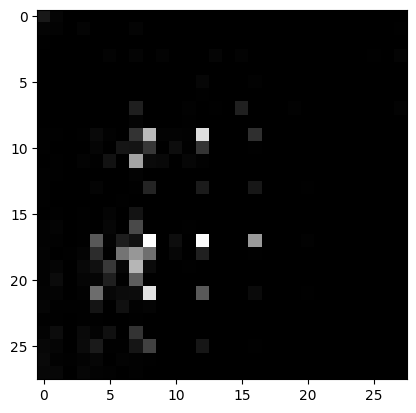

Epoch 2, Gen Loss: 0.7928, Disc Loss: 1.4422


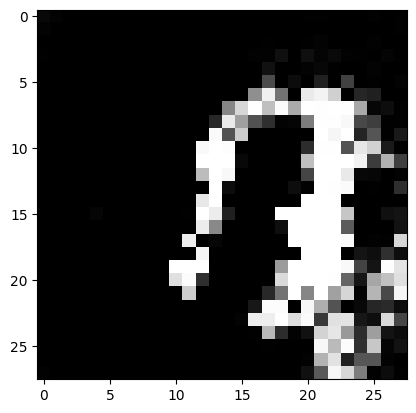

Epoch 3, Gen Loss: 0.8290, Disc Loss: 1.2962


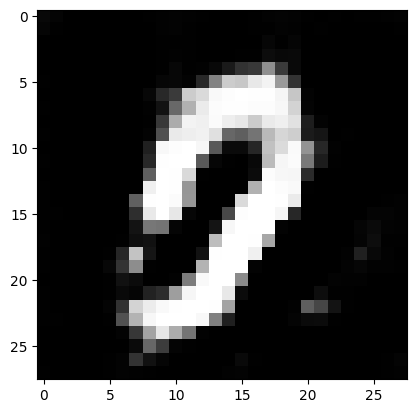

Epoch 4, Gen Loss: 0.8561, Disc Loss: 1.2995


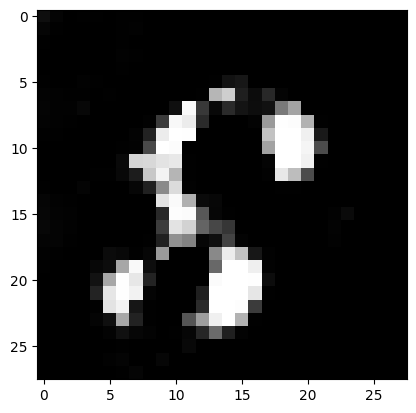

Epoch 5, Gen Loss: 0.9494, Disc Loss: 1.1777


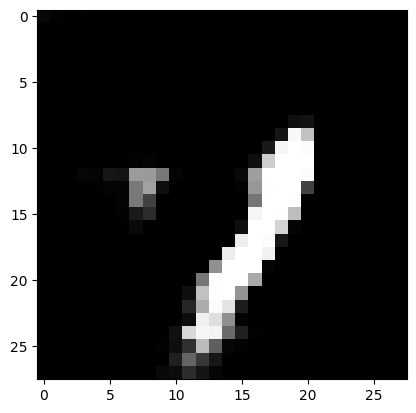

Epoch 6, Gen Loss: 1.0060, Disc Loss: 0.9747


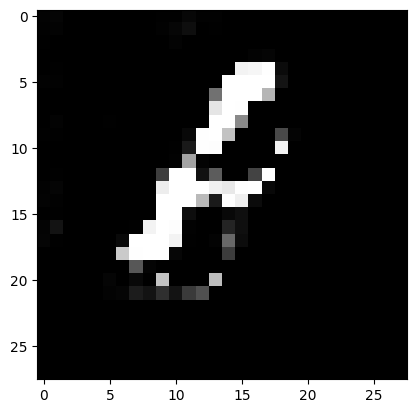

Epoch 7, Gen Loss: 0.9927, Disc Loss: 1.1890


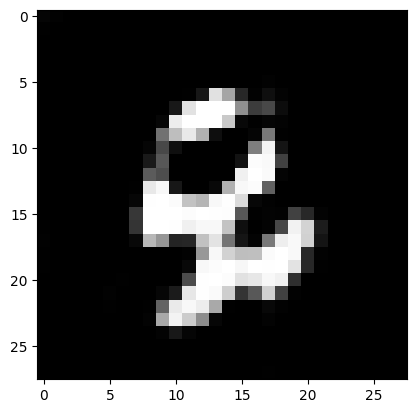

Epoch 8, Gen Loss: 0.9172, Disc Loss: 1.2672


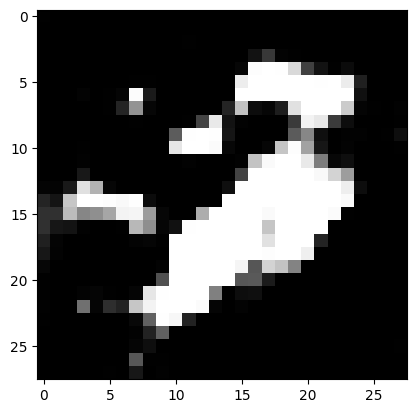

Epoch 9, Gen Loss: 1.1196, Disc Loss: 1.1421


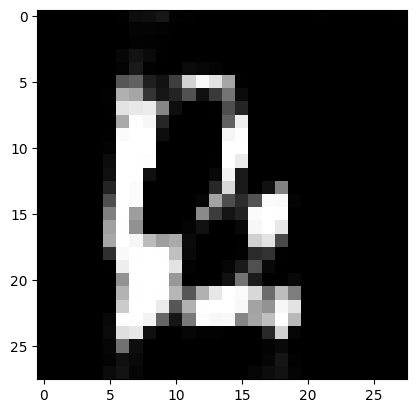

Epoch 10, Gen Loss: 0.9166, Disc Loss: 1.2617


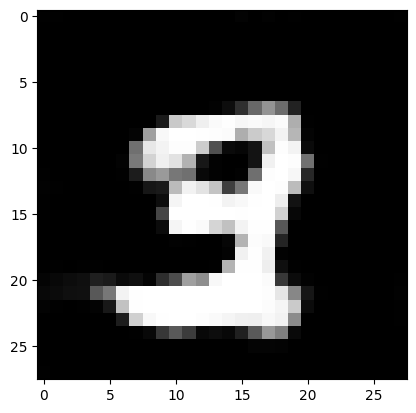

Epoch 11, Gen Loss: 1.1066, Disc Loss: 1.0327


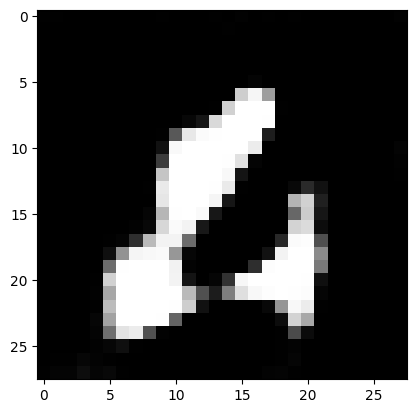

Epoch 12, Gen Loss: 0.9277, Disc Loss: 1.1440


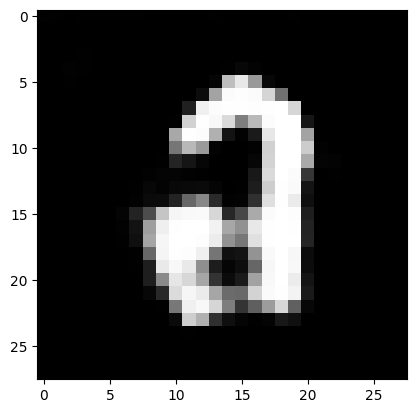

Epoch 13, Gen Loss: 1.2177, Disc Loss: 1.0490


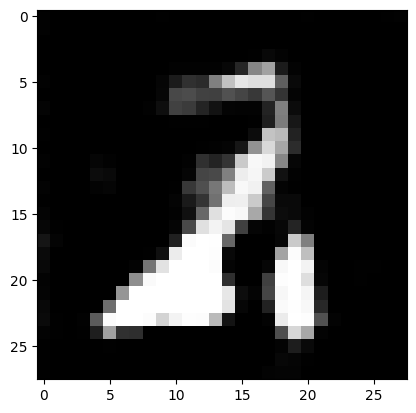

Epoch 14, Gen Loss: 1.2459, Disc Loss: 0.9378


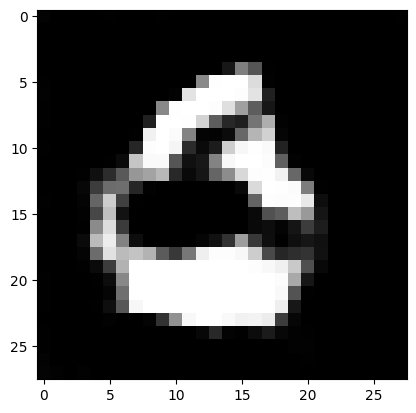

Epoch 15, Gen Loss: 1.1153, Disc Loss: 1.2102


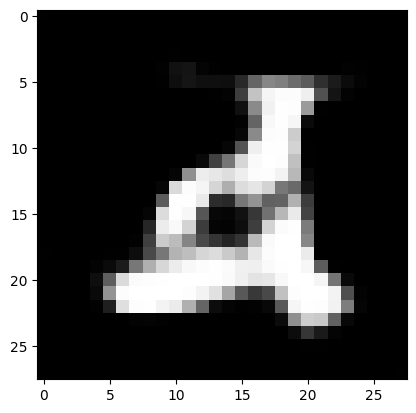

Epoch 16, Gen Loss: 0.9307, Disc Loss: 1.2523


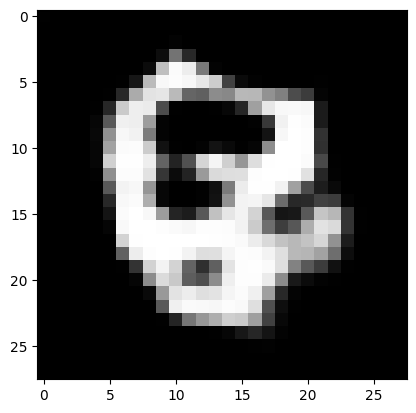

Epoch 17, Gen Loss: 0.8776, Disc Loss: 1.2796


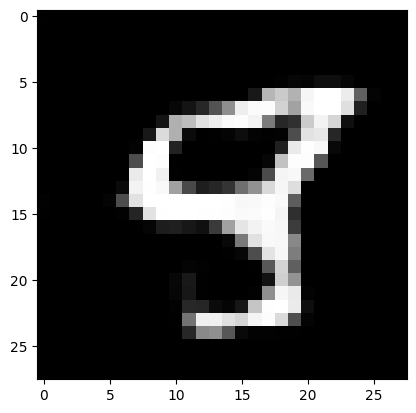

Epoch 18, Gen Loss: 0.9543, Disc Loss: 1.2139


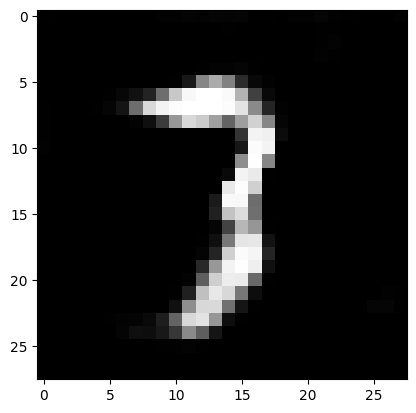

Epoch 19, Gen Loss: 0.9601, Disc Loss: 1.1731


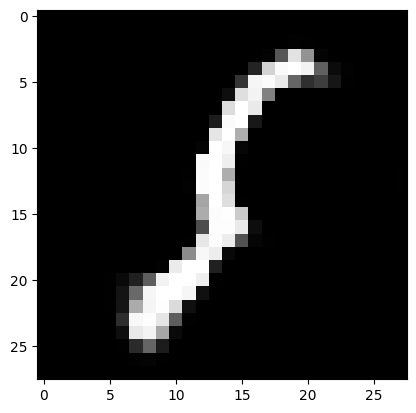

Epoch 20, Gen Loss: 0.9854, Disc Loss: 1.2645


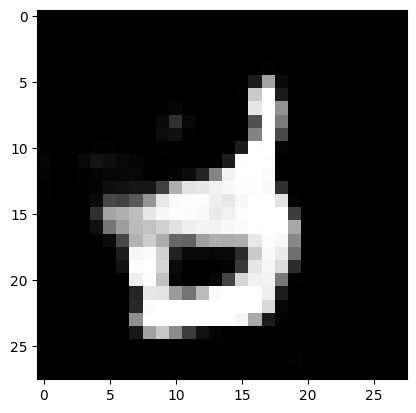

Epoch 21, Gen Loss: 1.0681, Disc Loss: 1.2667


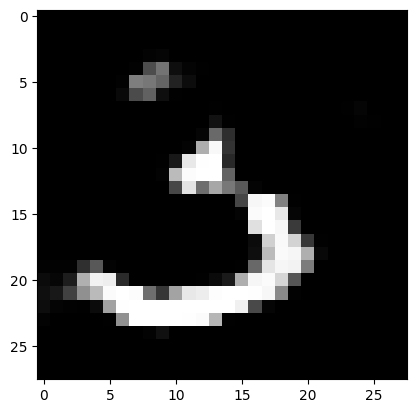

Epoch 22, Gen Loss: 0.9947, Disc Loss: 1.1130


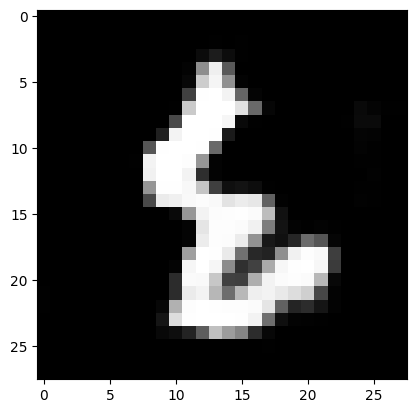

Epoch 23, Gen Loss: 0.9989, Disc Loss: 1.1624


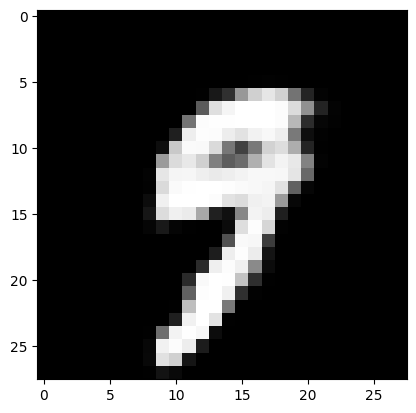

Epoch 24, Gen Loss: 0.9128, Disc Loss: 1.2768


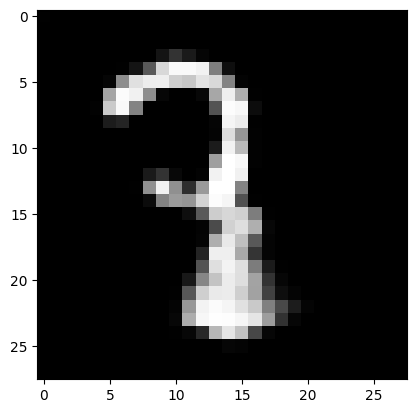

Epoch 25, Gen Loss: 0.9643, Disc Loss: 1.3047


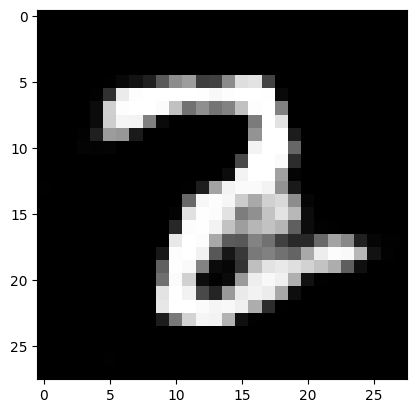

Epoch 26, Gen Loss: 1.1214, Disc Loss: 1.0427


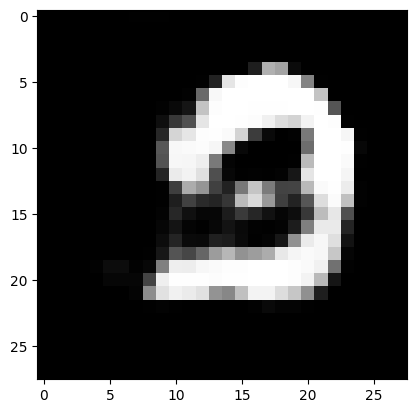

Epoch 27, Gen Loss: 1.0015, Disc Loss: 1.1510


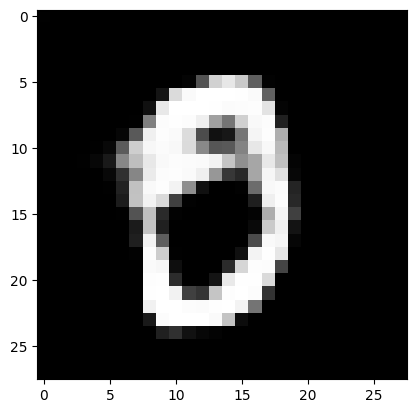

Epoch 28, Gen Loss: 0.9948, Disc Loss: 1.1695


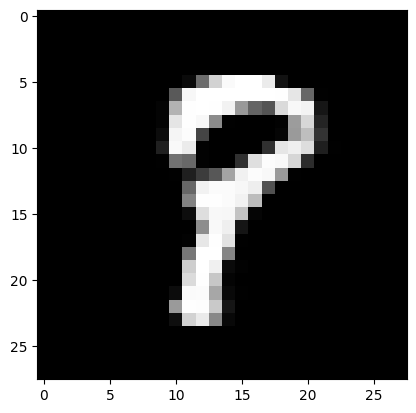

Epoch 29, Gen Loss: 0.7915, Disc Loss: 1.2254


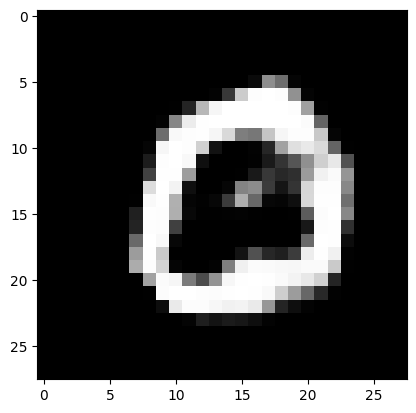

Epoch 30, Gen Loss: 1.2423, Disc Loss: 0.9870


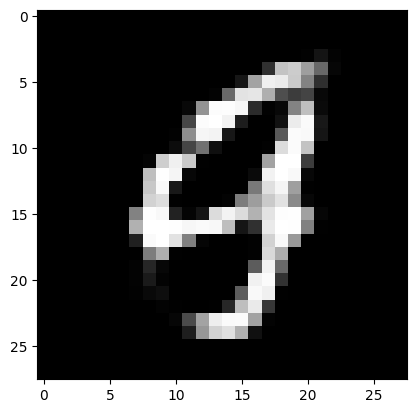

In [7]:
train(dataset, epochs=30)


Aquí tienes una explicación paso a paso, en español y con foco didáctico, de **cada bloque** del código de la GAN que te pasé para Colab. La idea es que puedas entender qué hace, por qué se hace así y cómo verificar que todo funciona.

---

# 1) Instalación y librerías

```python
!pip install tensorflow==2.15
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
```

* `!pip install tensorflow==2.15`: en Colab fuerza la instalación de una versión conocida y estable de TensorFlow para asegurar compatibilidad.
* `import tensorflow as tf`: importa TensorFlow, el framework principal para construir y entrenar la red.
* `from tensorflow.keras import layers`: trae atajos a capas de Keras (Conv2D, Dense, etc.).
* `import numpy as np`: NumPy se usa para manejo de arreglos numéricos.
* `import matplotlib.pyplot as plt`: para visualizar imágenes generadas durante el entrenamiento.

---

# 2) Carga y preparación del dataset

```python
# Cargar MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocesamiento
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
```

* `tf.keras.datasets.mnist.load_data()`: descarga MNIST (imágenes 28×28 en escala de grises). Solo necesitamos las imágenes de entrenamiento; las etiquetas se ignoran porque una GAN no es supervisada.
* `reshape(..., 28, 28, 1)`: añade el canal de color (1 canal) para que la forma sea compatible con capas convolucionales.
* `astype('float32')`: convierte a punto flotante, requerido por la mayoría de operaciones de TF.
* Normalización `(-1, 1)`: `(img - 127.5)/127.5` centra y escala los píxeles a ese rango. Es importante porque el **generador** usa `tanh` en la salida, que también produce valores en `(-1, 1)`. Esta consistencia acelera y estabiliza el entrenamiento.
* `BUFFER_SIZE`: tamaño del buffer para mezclar (shuffle) el dataset. 60k es el tamaño completo de MNIST.
* `BATCH_SIZE`: tamaño del lote; 128 es un valor típico para balancear estabilidad y rapidez.
* `tf.data.Dataset.from_tensor_slices(...).shuffle(...).batch(...)`: crea un pipeline eficiente. Se barajan las imágenes y se entregan en lotes a la GPU.

---

# 3) Arquitectura del generador

```python
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=2, padding='same', use_bias=False, activation='tanh'))
    return model

generator = build_generator()
```

* El **generador** toma como entrada un vector de ruido de dimensión 100 (`input_shape=(100,)`). Es el espacio latente.
* `Dense(7*7*256, use_bias=False)`: proyecta el ruido a un bloque tensorial grande que luego se reacomoda en un mapa de activación 7×7 con 256 canales.
* `BatchNormalization` + `LeakyReLU`: BN estabiliza la distribución de activaciones; LeakyReLU evita neuronas muertas y mejora el flujo de gradientes.
* `Reshape((7, 7, 256))`: convierte el vector plano a un “volumen” espacial pequeño.
* `Conv2DTranspose`: capas deconvolucionales (o convoluciones transpuestas) que van **aumentando** la resolución espacial.

  * Primera: mantiene 7×7 (stride 1), reduce canales a 128.
  * Segunda: `strides=2` duplica la resolución a 14×14.
  * Tercera: `strides=2` la lleva a 28×28 y deja 1 canal final.
* `activation='tanh'` en la última capa: combina con la normalización de las imágenes a `(-1, 1)`.

Resultado: el generador aprende a transformar ruido en imágenes 28×28 que parezcan dígitos.

---

# 4) Arquitectura del discriminador

```python
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5,5), strides=2, padding="same", input_shape=[28,28,1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5,5), strides=2, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

discriminator = build_discriminator()
```

* El **discriminador** recibe una imagen 28×28×1 (real o generada).
* Dos bloques `Conv2D`: con `strides=2` se reduce la resolución (28→14→7), aumentando canales (64→128). LeakyReLU introduce no linealidad; Dropout agrega regularización.
* `Flatten()` aplana el volumen a un vector.
* `Dense(1)`: produce **un logit** (un escalar real sin activación). Más adelante se combinará con `BinaryCrossentropy(from_logits=True)`. No se usa `sigmoid` aquí explícitamente; la pérdida lo maneja internamente.

El discriminador aprende a puntuar “real vs falso”.

---

# 5) Pérdidas y optimizadores

```python
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

noise_dim = 100
```

* `BinaryCrossentropy(from_logits=True)`: indica que el discriminador devuelve **logits** (no probabilidades). La función aplicará internamente la sigmoide de forma numéricamente estable.
* `discriminator_loss`:

  * Para imágenes reales: etiqueta objetivo 1.
  * Para imágenes falsas: etiqueta objetivo 0.
  * Se suman ambas pérdidas.
* `generator_loss`:

  * El generador desea **engañar** al discriminador, por eso compara la salida del discriminador sobre imágenes falsas contra la etiqueta 1.
* Optimizadores Adam con `1e-4`: valor típico que da estabilidad en GANs básicas.
* `noise_dim = 100`: dimensión del vector latente coherente con la entrada del generador.

---

# 6) Un paso de entrenamiento (train_step)

```python
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss
```

* `@tf.function`: compila el paso en un grafo para acelerar la ejecución.
* `noise = tf.random.normal([BATCH_SIZE, noise_dim])`: crea un lote de vectores de ruido.
* Dos `GradientTape`:

  * `gen_tape`: rastrea operaciones que involucran variables del generador, para luego calcular gradientes de `gen_loss`.
  * `disc_tape`: similar para el discriminador con `disc_loss`.
* `generated_images = generator(noise, training=True)`: produce imágenes falsas a partir del ruido.
* `real_output = discriminator(images, training=True)`: evalúa el discriminador sobre imágenes reales del dataset.
* `fake_output = discriminator(generated_images, training=True)`: evalúa el discriminador sobre las imágenes falsas.
* `gen_loss` y `disc_loss`: se calculan con las funciones definidas antes.
* `gen_tape.gradient(...)` y `disc_tape.gradient(...)`: obtienen gradientes de cada red respecto a su pérdida.
* `apply_gradients(...)`: actualiza pesos de cada red con su optimizador correspondiente.
* Devuelve las pérdidas para poder registrarlas o imprimirlas.

---

# 7) Bucle de entrenamiento

```python
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

        # Mostrar imagen generada al final de cada epoch
        noise = tf.random.normal([1, noise_dim])
        generated_img = generator(noise, training=False)[0, :, :, 0]
        plt.imshow((generated_img + 1) / 2, cmap='gray')
        plt.show()
```

* Recorre `epochs` veces todo el dataset. Por cada lote (`image_batch`) realiza `train_step`.
* Al finalizar la época, imprime las pérdidas de la última iteración del bucle interno.
* Genera y muestra una imagen de ejemplo:

  * `training=False` desactiva capas como Dropout/BN en modo entrenamiento.
  * `(generated_img + 1) / 2` reescala de `(-1, 1)` a `(0, 1)` para visualizar.

---

# 8) Lanzar el entrenamiento

```python
train(dataset, epochs=30)
```

* Ejecuta el entrenamiento durante 30 épocas. Puedes ajustar este número según GPU/tiempo/calidad esperada.

---

## Cómo saber si va bien

* Las pérdidas no son directamente comparables entre sí, pero típicamente verás que:

  * `Disc Loss` oscila, a veces sube cuando el generador mejora.
  * `Gen Loss` también oscila; si se desploma a valores muy bajos o muy altos por muchas épocas seguidas, puede haber colapso de modos o inestabilidad.
* Visualmente, las imágenes generadas deberían pasar de ruido a dígitos con rasgos reconocibles tras unas 5–10 épocas.

---

## Decisiones de diseño clave y por qué

* **Salida del discriminador como logit** y `from_logits=True`: evita problemas numéricos y es el patrón recomendado para estabilidad.
* **Normalización a (-1, 1)** y `tanh` al final del generador: empareja distribución esperada de la salida del generador con la preprocesada del dataset.
* **BatchNorm en el generador**: estabiliza la distribución de activaciones y facilita el aprendizaje al “escalar” correctamente las activaciones en cada capa.
* **LeakyReLU**: evita saturación y mejora gradientes respecto a ReLU pura, tanto en generador como en discriminador.
* **Adam con 1e-4**: valor probado para DCGAN sobre MNIST; tasas más altas pueden desestabilizar.

---

## Ajustes y extensiones sugeridas

* Cambiar `BATCH_SIZE`: lotes más grandes pueden mejorar estabilidad pero requieren más memoria.
* Añadir un **seed fijo** para reproducibilidad al generar imágenes en cada época.
* Guardar modelos e imágenes por época para inspección posterior.
* Usar **estrategias de entrenamiento** como label smoothing para el discriminador (etiquetas reales como 0.9 en vez de 1.0), o ruido en etiquetas/entradas, si observas sobreajuste del discriminador.
* Probar datasets más complejos (Fashion-MNIST, CIFAR-10) ajustando la arquitectura.



In [ ]:
# Proyecto

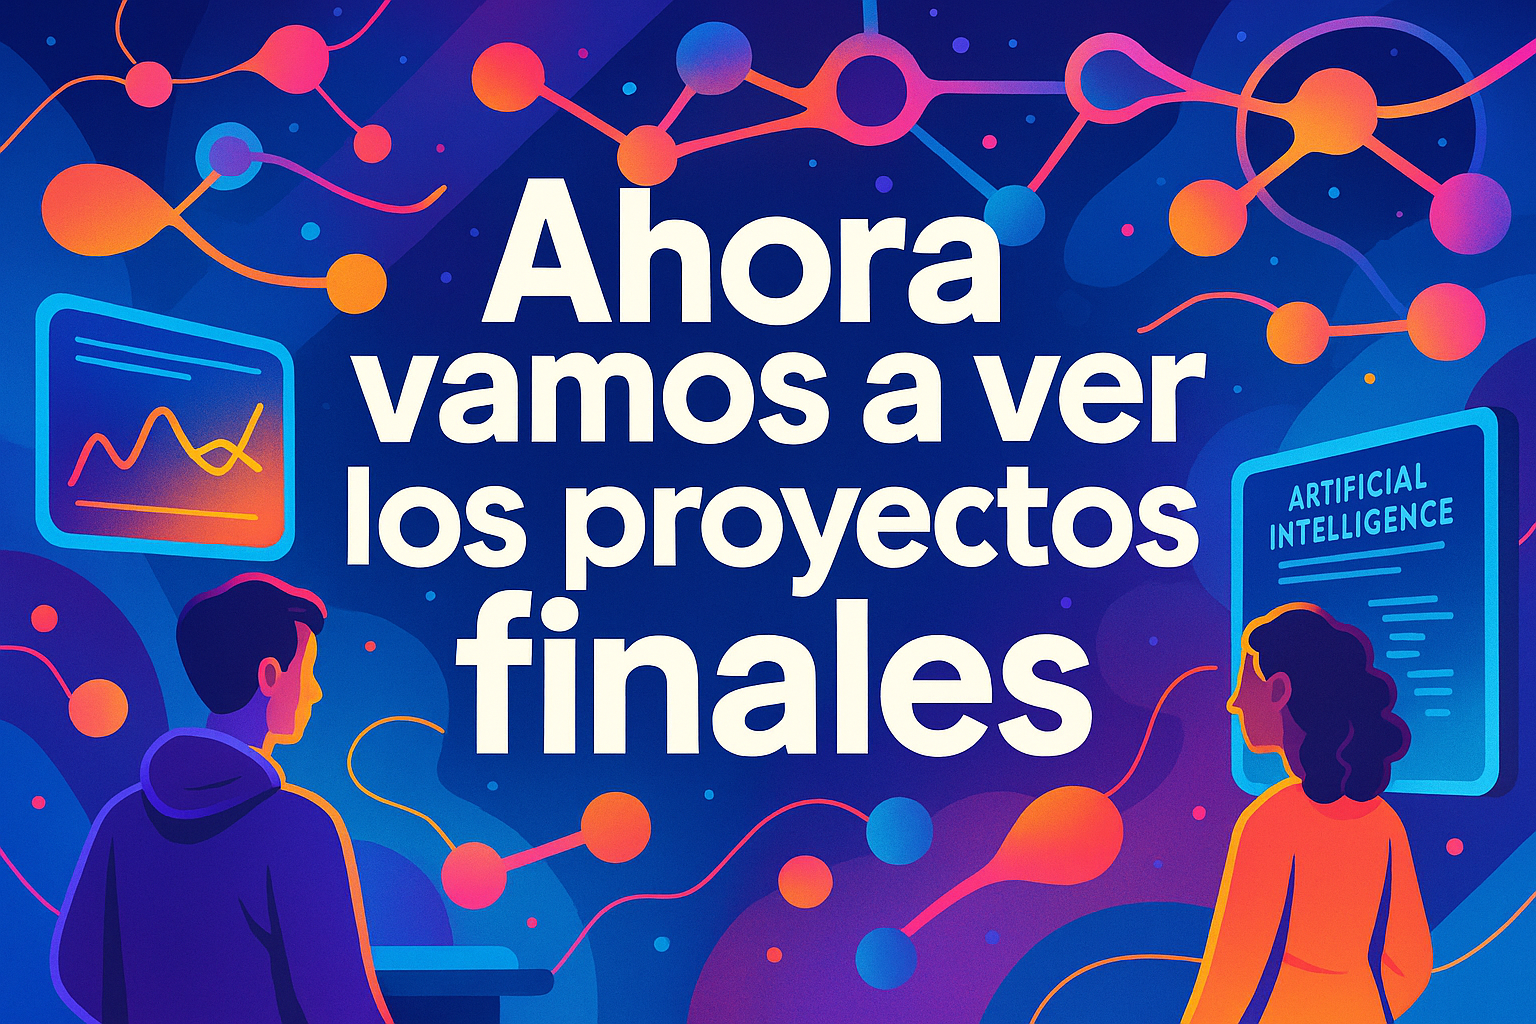

## Orden de Grupos SIC IA – Septiembre / Proyecto Final (en desarrollo)

### 1) **Jóvenes Ahorradores**

**Idea Principal:** Sistema de apoyo para mejorar la gestión financiera personal en jóvenes.
**Sub-ideas consideradas:**

* Asistentes de hábitos de gasto.
* Detector de compras por impulso.
* Comunidad de apoyo entre ahorradores moderada por IA.
* Análisis de costo/beneficio por uso de productos.
  **Integrantes:**
  Gabriela Sarpi, Javiera Ignaciana Aguilar, Montserrat Flores, Giovanna Tapia.

---

### 2) **Prevención del Suicidio en Colegios**

**Idea Principal:** Algoritmo de alerta temprana para riesgo suicida en estudiantes.
Incluye:

* Detección temprana.
* Señales conductuales.
* Monitoreo seguro y ético junto a profesionales.
  **Integrantes:**
  Fernanda Romero, María Luisa Saldivia, Ivette Henríquez, Yosselinne Navarro.

---

### 3) **Predicción de Normativa en Planes Reguladores**

**Idea Principal:** Sistema que prediga el tipo de normativa urbana aplicable según características del predio.
**Integrantes:**
Antonia Reyes.

---

### 4) **Agricultura y Clasificación de Suelos**

**Idea Principal:** Identificación del tipo de suelo óptimo para siembra mediante análisis digital.
**Integrantes:**
Bárbara Castillo.

---

### 5) **Generador de Partituras Musicales**

**Idea Principal:** IA que genere partituras a partir de sonido, voz o indicaciones descriptivas.
Posibilidad de combinar:

* Reconocimiento de audio.
* Modelos generativos secuenciales (RNN/LSTM).
  **Integrantes:**
  Alejandra Contreras, Ralitza Mancilla, Fernanda Nordenflycht.

---

### 6) **Predicción de Robos con Computer Vision**

**Idea Principal:** Sistema que detecte patrones en video para anticipar situaciones de riesgo.
Posibles componentes:

* Detección de comportamiento sospechoso.
* Entrenamiento con cámaras y dataset vigilado.
  **Integrantes:**
  Tamara Vergara.

---

## Estado General

* Todos los grupos tienen **tema definido**.
* Algunos requieren ajustar **enfoque, datos y viabilidad técnica**.
* Aún no se han definido **fechas de entrega**, **formato de presentación** ni **producto final mínimo**.

